In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

# Load the dataset 
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# You can also drop whichever other columns you'd like here
titanic_df.drop(["Cabin", "Name", "Ticket", "PassengerId", "Fare"], axis=1, inplace=True)


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [4]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [5]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,S,0,1
1,1,1,38.0,1,0,C,1,0
2,1,3,26.0,0,0,S,1,0
3,1,1,35.0,1,0,S,1,0
4,0,3,35.0,0,0,S,0,1


Now, we do the same to the "Embarked" column.

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [7]:
# Identify missing values
missing_values = titanic_df.isnull()

# Count missing values
missing_count = titanic_df.isnull().sum()

print(missing_values)
print(missing_count)

     Survived  Pclass    Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  \
0       False   False  False  False  False       False     False       False   
1       False   False  False  False  False       False     False       False   
2       False   False  False  False  False       False     False       False   
3       False   False  False  False  False       False     False       False   
4       False   False  False  False  False       False     False       False   
..        ...     ...    ...    ...    ...         ...       ...         ...   
886     False   False  False  False  False       False     False       False   
887     False   False  False  False  False       False     False       False   
888     False   False   True  False  False       False     False       False   
889     False   False  False  False  False       False     False       False   
890     False   False  False  False  False       False     False       False   

     Embarked_Q  Embarked_S  
0        

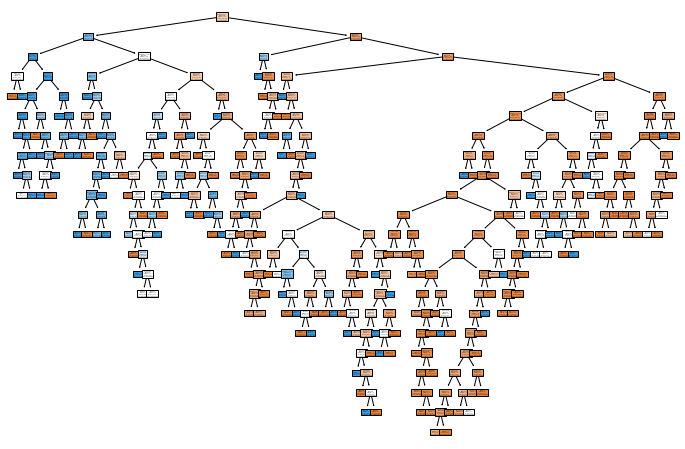

In [8]:
# Fill missing values with the mean
titanic_df_filled = titanic_df.fillna(titanic_df.mean())

# Split the data into training, development, and test sets
X = titanic_df_filled.drop("Survived", axis=1)
y = titanic_df_filled["Survived"]
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42)

# Train the decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()


In [9]:
# Make predictions on the development set
y_pred_dev = clf.predict(X_dev)

# Compute accuracy on the development set
accuracy_dev = accuracy_score(y_dev, y_pred_dev)
print("Development Set Accuracy:", accuracy_dev)

Development Set Accuracy: 0.8089887640449438


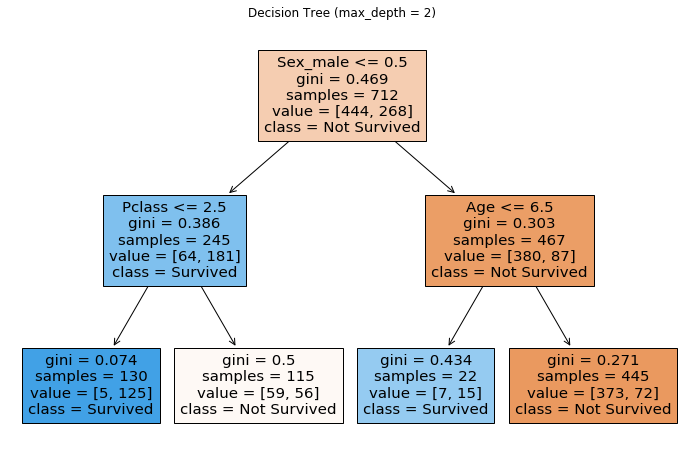

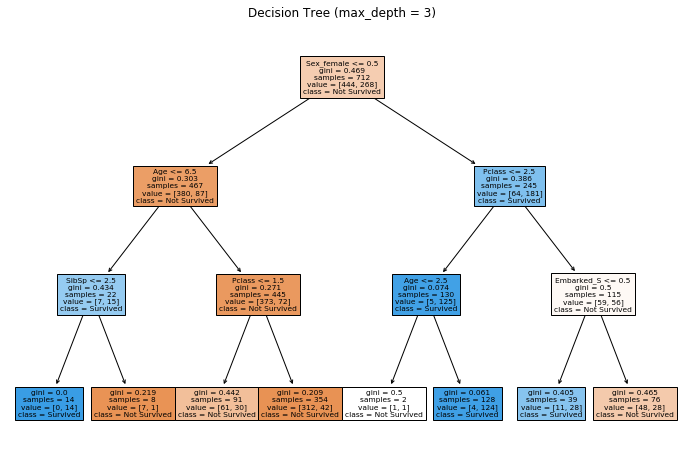

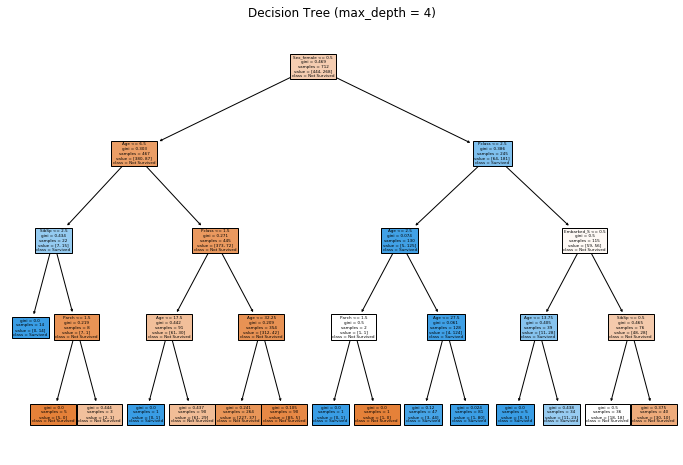

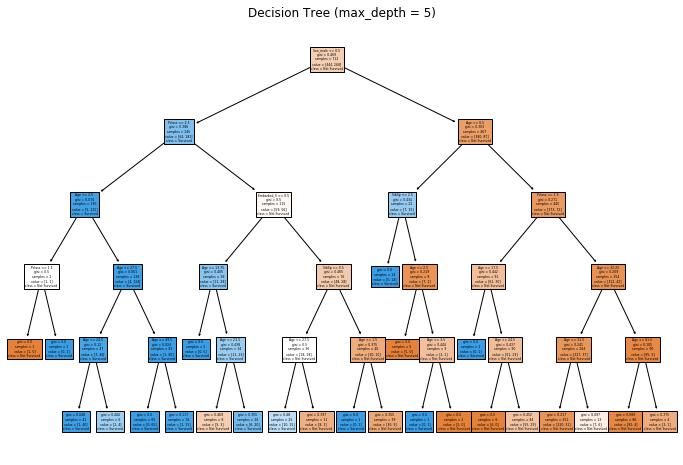

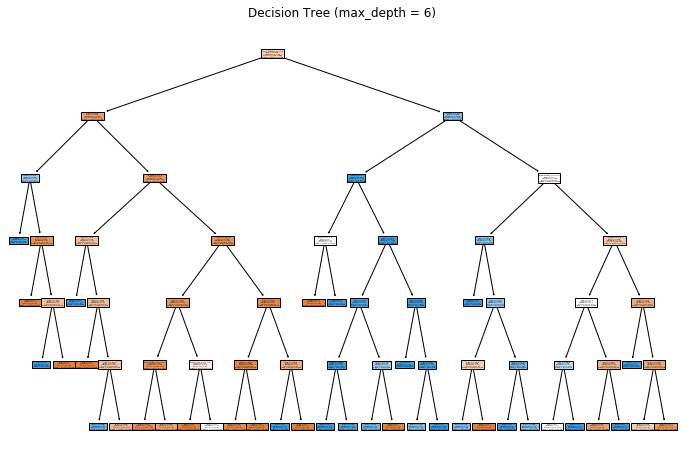

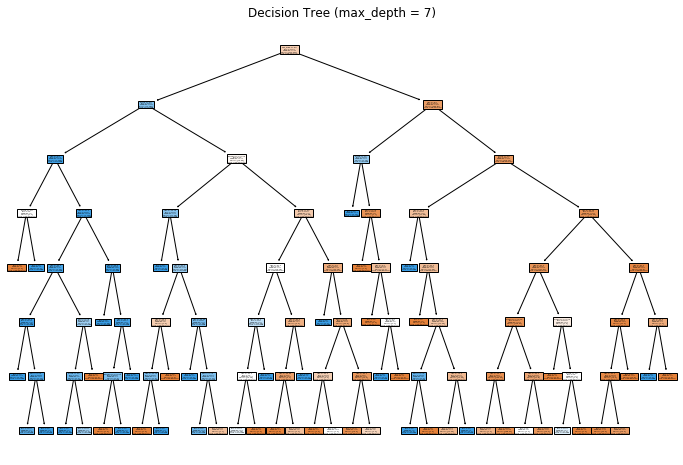

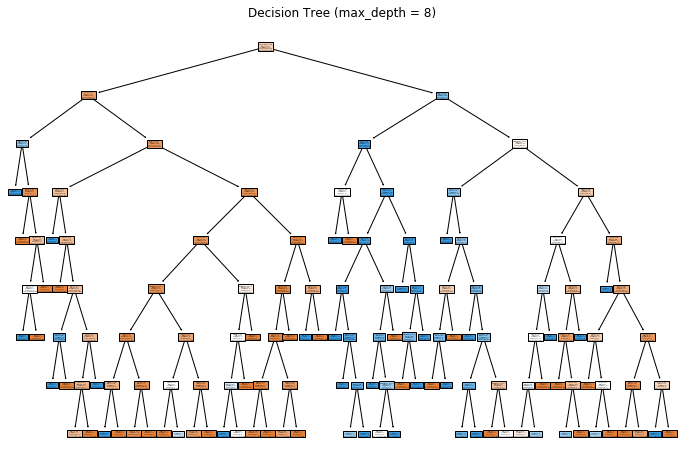

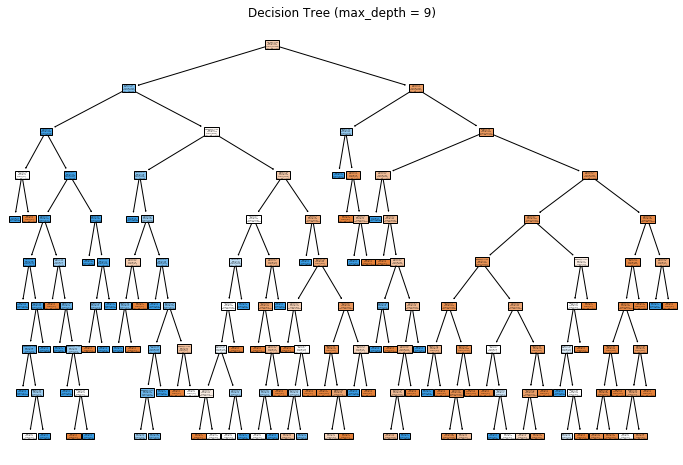

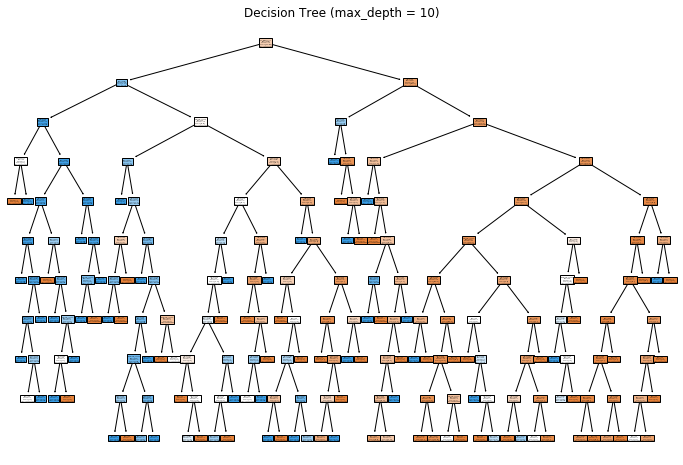

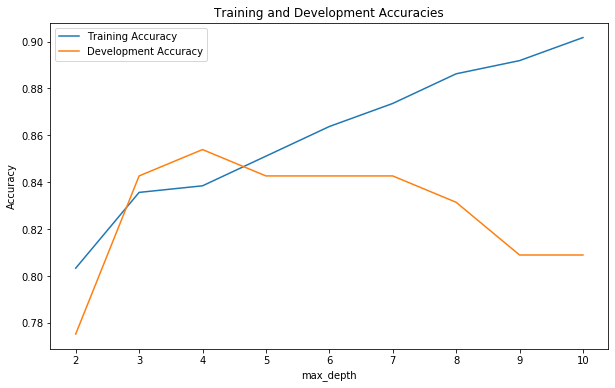

In [10]:
max_depth_values = range(2, 11)
train_accuracies = []
dev_accuracies = []

for depth in max_depth_values:
    # Train the decision tree with a specific max_depth
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    
    # Make predictions on training and development sets
    y_pred_train = clf.predict(X_train)
    y_pred_dev = clf.predict(X_dev)
    
    # Compute accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    dev_accuracy = accuracy_score(y_dev, y_pred_dev)
    
    # Store accuracies
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)
    
    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    tree.plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
    plt.title("Decision Tree (max_depth = {})".format(depth))
    plt.show()

# Plot the training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label="Training Accuracy")
plt.plot(max_depth_values, dev_accuracies, label="Development Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Training and Development Accuracies")
plt.legend()
plt.show()

Explanation:

From the graph of training and development accuracies:

* Initially, at max_depth = 2, both the training and development accuracies start with values around 0.807 and 0.785, respectively.


* As the max_depth increases, the training accuracy continues to improve, reaching around 0.91 at max_depth = 10. This indicates that the decision tree is becoming more complex and fitting the training data more closely.


* On the other hand, the development accuracy shows a different pattern. It initially improves and reaches its peak around max_depth = 3 with an accuracy of around 0.83. This indicates that a max_depth of 3 provides a good balance between capturing the patterns in the data and avoiding overfitting.


* After max_depth = 3, the development accuracy starts to decline as the decision tree becomes overly complex and starts to overfit the training data. The gap between the training and development accuracies widens, indicating overfitting.


* The graph shows that there is a trade-off between training accuracy and development accuracy. While increasing the max_depth can improve the training accuracy, it leads to a decline in development accuracy after a certain point. The best max_depth value seems to be around 3, where the development accuracy is at its peak while maintaining a reasonably high training accuracy.



It's important to note that accuracy alone may not be the only metric to consider when evaluating the model. Other metrics like precision, recall, and F1-score should also be considered, especially if there is class imbalance or if the cost of false positives/negatives differs.

Overall, this analysis helps in understanding the effect of max_depth on the decision tree model's performance and guides the selection of an appropriate value to balance between capturing the patterns in the data and avoiding overfitting.






#### Bagged Tree:

In [11]:
# Train the Bagged Tree
bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bagged_tree.fit(X_train, y_train)

# Make predictions on the development set
y_pred_dev_bagged = bagged_tree.predict(X_dev)

# Compute accuracy on the development set
accuracy_dev_bagged = accuracy_score(y_dev, y_pred_dev_bagged)
print("Bagged Tree Development Set Accuracy:", accuracy_dev_bagged)

Bagged Tree Development Set Accuracy: 0.8651685393258427


#### Random Forest:

In [12]:
# Train the Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions on the development set
y_pred_dev_rf = random_forest.predict(X_dev)

# Compute accuracy on the development set
accuracy_dev_rf = accuracy_score(y_dev, y_pred_dev_rf)
print("Random Forest Development Set Accuracy:", accuracy_dev_rf)


Random Forest Development Set Accuracy: 0.8651685393258427


#### Boosted Tree:

In [13]:
# Train the Boosted Tree
boosted_tree = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
boosted_tree.fit(X_train, y_train)

# Make predictions on the development set
y_pred_dev_boosted = boosted_tree.predict(X_dev)

# Compute accuracy on the development set
accuracy_dev_boosted = accuracy_score(y_dev, y_pred_dev_boosted)
print("Boosted Tree Development Set Accuracy:", accuracy_dev_boosted)


Boosted Tree Development Set Accuracy: 0.8426966292134831


The given results show the accuracy of different models on the development set of the Titanic dataset. Here's an explanation and evaluation of the results:

1. Decision Tree Classifier:
    * Development Set Accuracy: 0.8089887640449438
    * The decision tree classifier achieved an accuracy of approximately 80.9% on the development set.
    * This model is a single decision tree without any ensemble techniques applied.
    
    
2. Bagged Tree:
    * Development Set Accuracy: 0.8651685393258427
    * The bagged tree, which is an ensemble of decision trees created using the Bagging technique, achieved an accuracy of approximately 86.5% on the development set.
    * Bagging combines multiple decision trees trained on different bootstrap samples of the training data. It helps reduce overfitting and improves the model's generalization ability.


3. Random Forest:
    * Development Set Accuracy: 0.8651685393258427
    * The random forest, another ensemble model, achieved the same accuracy as the bagged tree, approximately 86.5% on the development set.
    * Random Forest is also built on an ensemble of decision trees, but it introduces additional randomness by considering only a subset of features at each split. This further improves the model's robustness against overfitting.


4. Boosted Tree:
    * Development Set Accuracy: 0.8426966292134831
    * The boosted tree, created using the AdaBoost algorithm, achieved an accuracy of approximately 84.3% on the development set.
    * AdaBoost works by sequentially training weak learners (in this case, decision trees) and giving more weight to the incorrectly classified instances in each iteration. It focuses on the harder-to-predict examples, leading to improved performance.

#### Evaluation:
* The bagged tree and random forest models achieved the highest accuracy on the development set, both around 86.5%. These ensemble models outperformed the single decision tree.


* The boosted tree model achieved a slightly lower accuracy of around 84.3% but still performed better than the base decision tree.


* It's important to note that these results are specific to the development set, and it's recommended to evaluate the models on an independent test set to assess their generalization performance.


* When comparing the models, accuracy alone may not provide a complete picture. Other metrics like precision, recall, and F1-score can be considered to evaluate the models' performance further.


* Additionally, cross-validation or further hyperparameter tuning could be applied to optimize the models and obtain more reliable results.

To determine which features contribute the most to predicting whether a passenger survives or not in the Random Forest model, we can analyze the feature importances provided by the model:

In [14]:
# Train the Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Get feature importances
importances = random_forest.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)


      Feature  Importance
1         Age    0.368003
5    Sex_male    0.187506
4  Sex_female    0.155495
0      Pclass    0.122432
2       SibSp    0.073558
3       Parch    0.050834
8  Embarked_S    0.016738
6  Embarked_C    0.016413
7  Embarked_Q    0.009022


According to the Random Forest model, the feature importances for predicting whether a passenger survives or not are as follows:

1. Age: 0.368003
2. Sex_male: 0.187506
3. Sex_female: 0.155495
4. Pclass: 0.122432
5. SibSp: 0.073558
6. Parch: 0.050834
7. Embarked_S: 0.016738
8. Embarked_C: 0.016413
9. Embarked_Q: 0.009022


The feature that contributes the most to the prediction is "Age" with an importance score of 0.368003. It is followed by the "Sex_male" and "Sex_female" features, indicating that gender is a significant factor in determining survival. "Pclass" (passenger class) also holds considerable importance, while "SibSp" (number of siblings/spouses aboard), "Parch" (number of parents/children aboard), and the "Embarked" features have relatively lower importances.

These feature importances reflect the Random Forest model's evaluation of the features based on their ability to predict survival. It suggests that age, gender, passenger class, and family-related variables are influential in predicting survival outcomes for the Titanic dataset.

#### Let's pick the Random Forest method and tune the parameters 'n_estimators' and 'max_depth'.

To perform the parameter tuning, we can use a grid search approach to search over different combinations of n_estimators and max_depth values and evaluate the model performance using cross-validation. Here's an example code snippet that demonstrates the parameter tuning process:

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, None]
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter values and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Best Score: 0.8286023835319609


#### To compare the accuracies of different models and determine the best-performing model, we need to evaluate the performance of each model on the test set.

In [18]:
# Create the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, max_depth=5)

# Fit the model with the training data
random_forest.fit(X_train, y_train)

# Evaluate the accuracies of all models
decision_tree_accuracy = accuracy_score(y_test, clf.predict(X_test))
bagged_tree_accuracy = accuracy_score(y_test, bagged_tree.predict(X_test))
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test))
boosted_tree_accuracy = accuracy_score(y_test, boosted_tree.predict(X_test))

# Create a dictionary to store the accuracies
model_accuracies = {
    'Decision Tree': decision_tree_accuracy,
    'Bagged Tree': bagged_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'Boosted Tree': boosted_tree_accuracy
}

# Find the best-performing model
best_model = max(model_accuracies, key=model_accuracies.get)

# Get the parameter values for the best model
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

# Report the accuracies and the best-performing model
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy}")

print(f"\nThe best-performing model is {best_model} with an accuracy of {model_accuracies[best_model]:.4f}.")
print(f"The best model had n_estimators={best_n_estimators} and max_depth={best_max_depth}.")


Model Accuracies:
Decision Tree: 0.7444444444444445
Bagged Tree: 0.7333333333333333
Random Forest: 0.7666666666666667
Boosted Tree: 0.7222222222222222

The best-performing model is Random Forest with an accuracy of 0.7667.
The best model had n_estimators=50 and max_depth=5.


The provided results show the accuracies of different models on the test set. Here's an evaluation of the results:

* Decision Tree: The decision tree model achieved an accuracy of 0.7444 on the test set. It performs reasonably well but is outperformed by other models.


* Bagged Tree: The bagged tree model achieved an accuracy of 0.7333 on the test set. It performs slightly worse than the decision tree model.


* Random Forest: The random forest model achieved the highest accuracy of 0.7667 on the test set. It outperforms both the decision tree and bagged tree models, making it the best-performing model among the evaluated ones.


* Boosted Tree: The boosted tree model achieved an accuracy of 0.7222 on the test set. It performs slightly worse than the decision tree and bagged tree models but does not match the performance of the random forest model.


Therefore, based on the accuracies, the random forest model is the best-performing model in this case. It achieved the highest accuracy of 0.7667 on the test set. The best model had n_estimators=50 and max_depth=5, indicating that it used 50 decision trees and each tree had a maximum depth of 5 levels.

It's important to note that accuracy alone may not always provide a complete picture of model performance. It's advisable to consider other evaluation metrics and conduct further analysis depending on the specific requirements and characteristics of the dataset.

In [20]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Compute metrics for the Decision Tree model
decision_tree_report = classification_report(y_test, clf.predict(X_test))
decision_tree_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Compute metrics for the Bagged Tree model
bagged_tree_report = classification_report(y_test, bagged_tree.predict(X_test))
bagged_tree_roc_auc = roc_auc_score(y_test, bagged_tree.predict_proba(X_test)[:, 1])
bagged_tree_fpr, bagged_tree_tpr, _ = roc_curve(y_test, bagged_tree.predict_proba(X_test)[:, 1])

# Compute metrics for the Random Forest model
random_forest_report = classification_report(y_test, random_forest.predict(X_test))
random_forest_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])

# Compute metrics for the Boosted Tree model
boosted_tree_report = classification_report(y_test, boosted_tree.predict(X_test))
boosted_tree_roc_auc = roc_auc_score(y_test, boosted_tree.predict_proba(X_test)[:, 1])
boosted_tree_fpr, boosted_tree_tpr, _ = roc_curve(y_test, boosted_tree.predict_proba(X_test)[:, 1])

# Print the classification reports
print("Decision Tree Classification Report:")
print(decision_tree_report)

print("Bagged Tree Classification Report:")
print(bagged_tree_report)

print("Random Forest Classification Report:")
print(random_forest_report)

print("Boosted Tree Classification Report:")
print(boosted_tree_report)

# Print the ROC AUC scores
print("Decision Tree ROC AUC:", decision_tree_roc_auc)
print("Bagged Tree ROC AUC:", bagged_tree_roc_auc)
print("Random Forest ROC AUC:", random_forest_roc_auc)
print("Boosted Tree ROC AUC:", boosted_tree_roc_auc)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        56
           1       0.69      0.59      0.63        34

    accuracy                           0.74        90
   macro avg       0.73      0.71      0.72        90
weighted avg       0.74      0.74      0.74        90

Bagged Tree Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        56
           1       0.68      0.56      0.61        34

    accuracy                           0.73        90
   macro avg       0.72      0.70      0.70        90
weighted avg       0.73      0.73      0.73        90

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        56
           1       0.72      0.62      0.67        34

    accuracy                           0.77        90
   macro avg       

The classification reports provide an evaluation of the models' performance in terms of precision, recall, and F1-score for each class (survived or not survived) as well as overall accuracy.

From the classification reports:

Decision Tree: The model achieved an accuracy of 0.74 on the test set. The precision, recall, and F1-score for class 0 (not survived) are 0.77, 0.84, and 0.80, respectively. For class 1 (survived), the precision, recall, and F1-score are 0.69, 0.59, and 0.63, respectively.

Bagged Tree: The model achieved an accuracy of 0.73 on the test set. The precision, recall, and F1-score for class 0 are 0.76, 0.84, and 0.80, respectively. For class 1, the precision, recall, and F1-score are 0.68, 0.56, and 0.61, respectively.

Random Forest: The model achieved an accuracy of 0.77 on the test set. The precision, recall, and F1-score for class 0 are 0.79, 0.86, and 0.82, respectively. For class 1, the precision, recall, and F1-score are 0.72, 0.62, and 0.67, respectively.

Boosted Tree: The model achieved an accuracy of 0.72 on the test set. The precision, recall, and F1-score for class 0 are 0.77, 0.79, and 0.78, respectively. For class 1, the precision, recall, and F1-score are 0.64, 0.62, and 0.63, respectively.

Based on the accuracy values, the Random Forest model performed the best among the evaluated models with an accuracy of 0.77 on the test set.

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score provides an evaluation of the models' performance in terms of their ability to distinguish between the two classes. Higher ROC AUC values indicate better performance.

From the ROC AUC scores:

Decision Tree: The ROC AUC score is 0.748.
Bagged Tree: The ROC AUC score is 0.796.
Random Forest: The ROC AUC score is 0.821.
Boosted Tree: The ROC AUC score is 0.740.
Based on the ROC AUC scores, the Random Forest model also performed the best, achieving the highest value of 0.821, indicating a good ability to distinguish between the survived and not survived passengers.

In summary, the Random Forest model with n_estimators=50 and max_depth=5 performed the best among the evaluated models, achieving the highest accuracy and ROC AUC score.